# IMPORTACION DE LIBRERIAS Y LECTURA DEL DATASET

In [337]:
# Librerías básicas
import pandas as pd
import numpy as np
from tabulate import tabulate
import math

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Libreria para separacion de datos train y test
import pickle
from pprint import pprint
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer

# Librerias a usar para el modelo de machine learning
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting

In [338]:
# Function que facilita la exploración básica del dataset
def summary(df):
    total_values = df.shape[0]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} rows.")    
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

In [339]:
#Lectura del dataset
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [340]:
# Configura Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# NULOS E IMPUTACION DE NULOS

- Se mira información del dataset: columnas 25, filas 103903, y solo la columna Arrival Delay in Minutes tiene nulos.

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

- Se rectifica que solo haya una columna con datos nulos efectivamente solo hay en la columna Arrival Delay in Minutes **310 datos nulos**, posteriormente se decidirá que hacer con estos nulos.

In [342]:
# df.isna().sum() --> Esta ya se incluye en la variable summary(df)
#df.nunique() --> Esta ya se incluye en la variable summary(df)
# Se trae la variable que definimos al principio del dataset para exploracion.
summary(df)

Dataset has 25 features and 103904 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,103904,0,0.0,0,int64
id,103904,0,0.0,0,int64
Gender,2,0,0.0,0,object
Customer Type,2,0,0.0,0,object
Age,75,0,0.0,0,int64
Type of Travel,2,0,0.0,0,object
Class,3,0,0.0,0,object
Flight Distance,3802,0,0.0,0,int64
Inflight wifi service,6,0,0.0,0,int64
Departure/Arrival time convenient,6,0,0.0,0,int64


**Observaciones**

- Columnas Unnamed, id no creo que sean importantes y se podrían eliminar. Además tienen una cardinalidad muy alta
- La columna Baggage handlingtiene 5 valores en vez de 6 como todas las demás. Empieza en 1 en vez de 0
- Arrival Delay in Minutes es la única que es flotante pasarla a int.
- Arrival Delay in Minutes es la única que tiene missign values = 310, un 0.3% Muy poquito.Imputamos

- Revisamos los valores unicos de la columna "Arrival Delay in Minutes" para ver si se podia pasar de float a int.

In [343]:
# Utiliza el método unique() para obtener todos los valores únicos
unique_values = df['Arrival Delay in Minutes'].unique()

# Muestra todos los valores únicos en la columna 'Arrival Delay in Minutes'
for value in unique_values:
    print(value)

18.0
6.0
0.0
9.0
23.0
8.0
35.0
51.0
10.0
5.0
4.0
29.0
44.0
28.0
12.0
120.0
24.0
1.0
20.0
31.0
15.0
48.0
26.0
49.0
2.0
37.0
50.0
3.0
19.0
72.0
11.0
34.0
62.0
27.0
52.0
13.0
82.0
30.0
16.0
7.0
122.0
179.0
125.0
17.0
nan
89.0
101.0
14.0
61.0
32.0
33.0
41.0
191.0
138.0
53.0
22.0
57.0
65.0
76.0
107.0
92.0
164.0
21.0
40.0
55.0
185.0
63.0
77.0
86.0
91.0
100.0
54.0
36.0
70.0
139.0
67.0
163.0
128.0
180.0
93.0
121.0
45.0
105.0
126.0
56.0
73.0
212.0
88.0
241.0
172.0
175.0
111.0
99.0
25.0
42.0
226.0
46.0
131.0
260.0
69.0
142.0
58.0
75.0
38.0
66.0
39.0
103.0
307.0
156.0
74.0
109.0
155.0
60.0
154.0
43.0
147.0
217.0
124.0
47.0
150.0
116.0
171.0
84.0
123.0
165.0
94.0
83.0
336.0
59.0
219.0
87.0
459.0
68.0
104.0
133.0
134.0
81.0
259.0
80.0
79.0
222.0
203.0
354.0
214.0
78.0
95.0
71.0
110.0
85.0
146.0
196.0
98.0
470.0
264.0
149.0
113.0
119.0
106.0
216.0
160.0
285.0
115.0
186.0
211.0
323.0
176.0
167.0
242.0
284.0
200.0
145.0
108.0
174.0
132.0
313.0
331.0
288.0
118.0
225.0
64.0
324.0
190.0
177.0
136.0
320.0

In [344]:
# Para llenar los valores nulos con la media: (MIRAR SI SE IMPUTAN CON MEDIA O MEDIANA)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

# Para eliminar las filas con valores nulos
#df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

- La columna 'Arrival Delay in Minutes' se puede pasar a int ya que no tiene valores que se consideren decimales.

In [345]:
# Para convertir una columna de tipo float a int 
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

### SE BORRAN COLUMNAS QUE NO SIRVEN 

In [346]:
columna_a_borrar = ['Unnamed: 0', "id"]
df = df.drop(columna_a_borrar, axis=1)

# Exploratory Data Analysis (EDA)
## Target Variable

<Axes: xlabel='satisfaction', ylabel='count'>

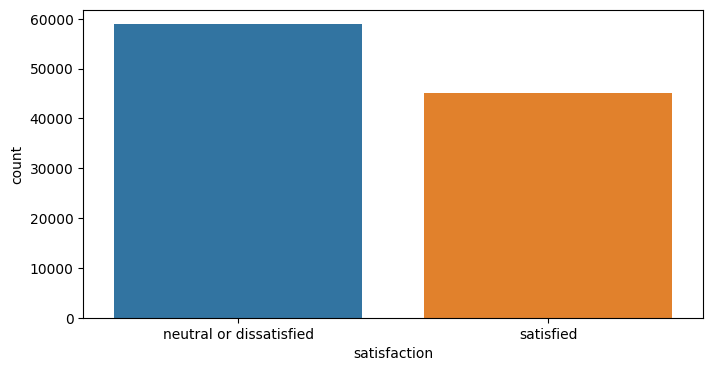

In [347]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='satisfaction')

In [348]:
opiniones_neutral_or_dissatisfied =(df['satisfaction'] == 'neutral or dissatisfied').sum()
# Imprimir la suma de opiniones "neutral or dissatisfied"
print("Suma de opiniones 'neutral or dissatisfied':", opiniones_neutral_or_dissatisfied)

Suma de opiniones 'neutral or dissatisfied': 58879


In [349]:
opiniones_satisfied=(df['satisfaction'] == 'satisfied').sum()
# Imprimir la suma de opiniones "satisfied"
print("Suma de opiniones 'satisfied':",opiniones_satisfied)

Suma de opiniones 'satisfied': 45025


- La variable esta balanceada, de momento se puede dejar asi, en caso de que estuviese desbalanceada se aplicarian tecnicas para balancear los datos y que el modelo funcionara mucho mejor.

### GRAFICA DE SERVICIOS DE LA AEROLINEA

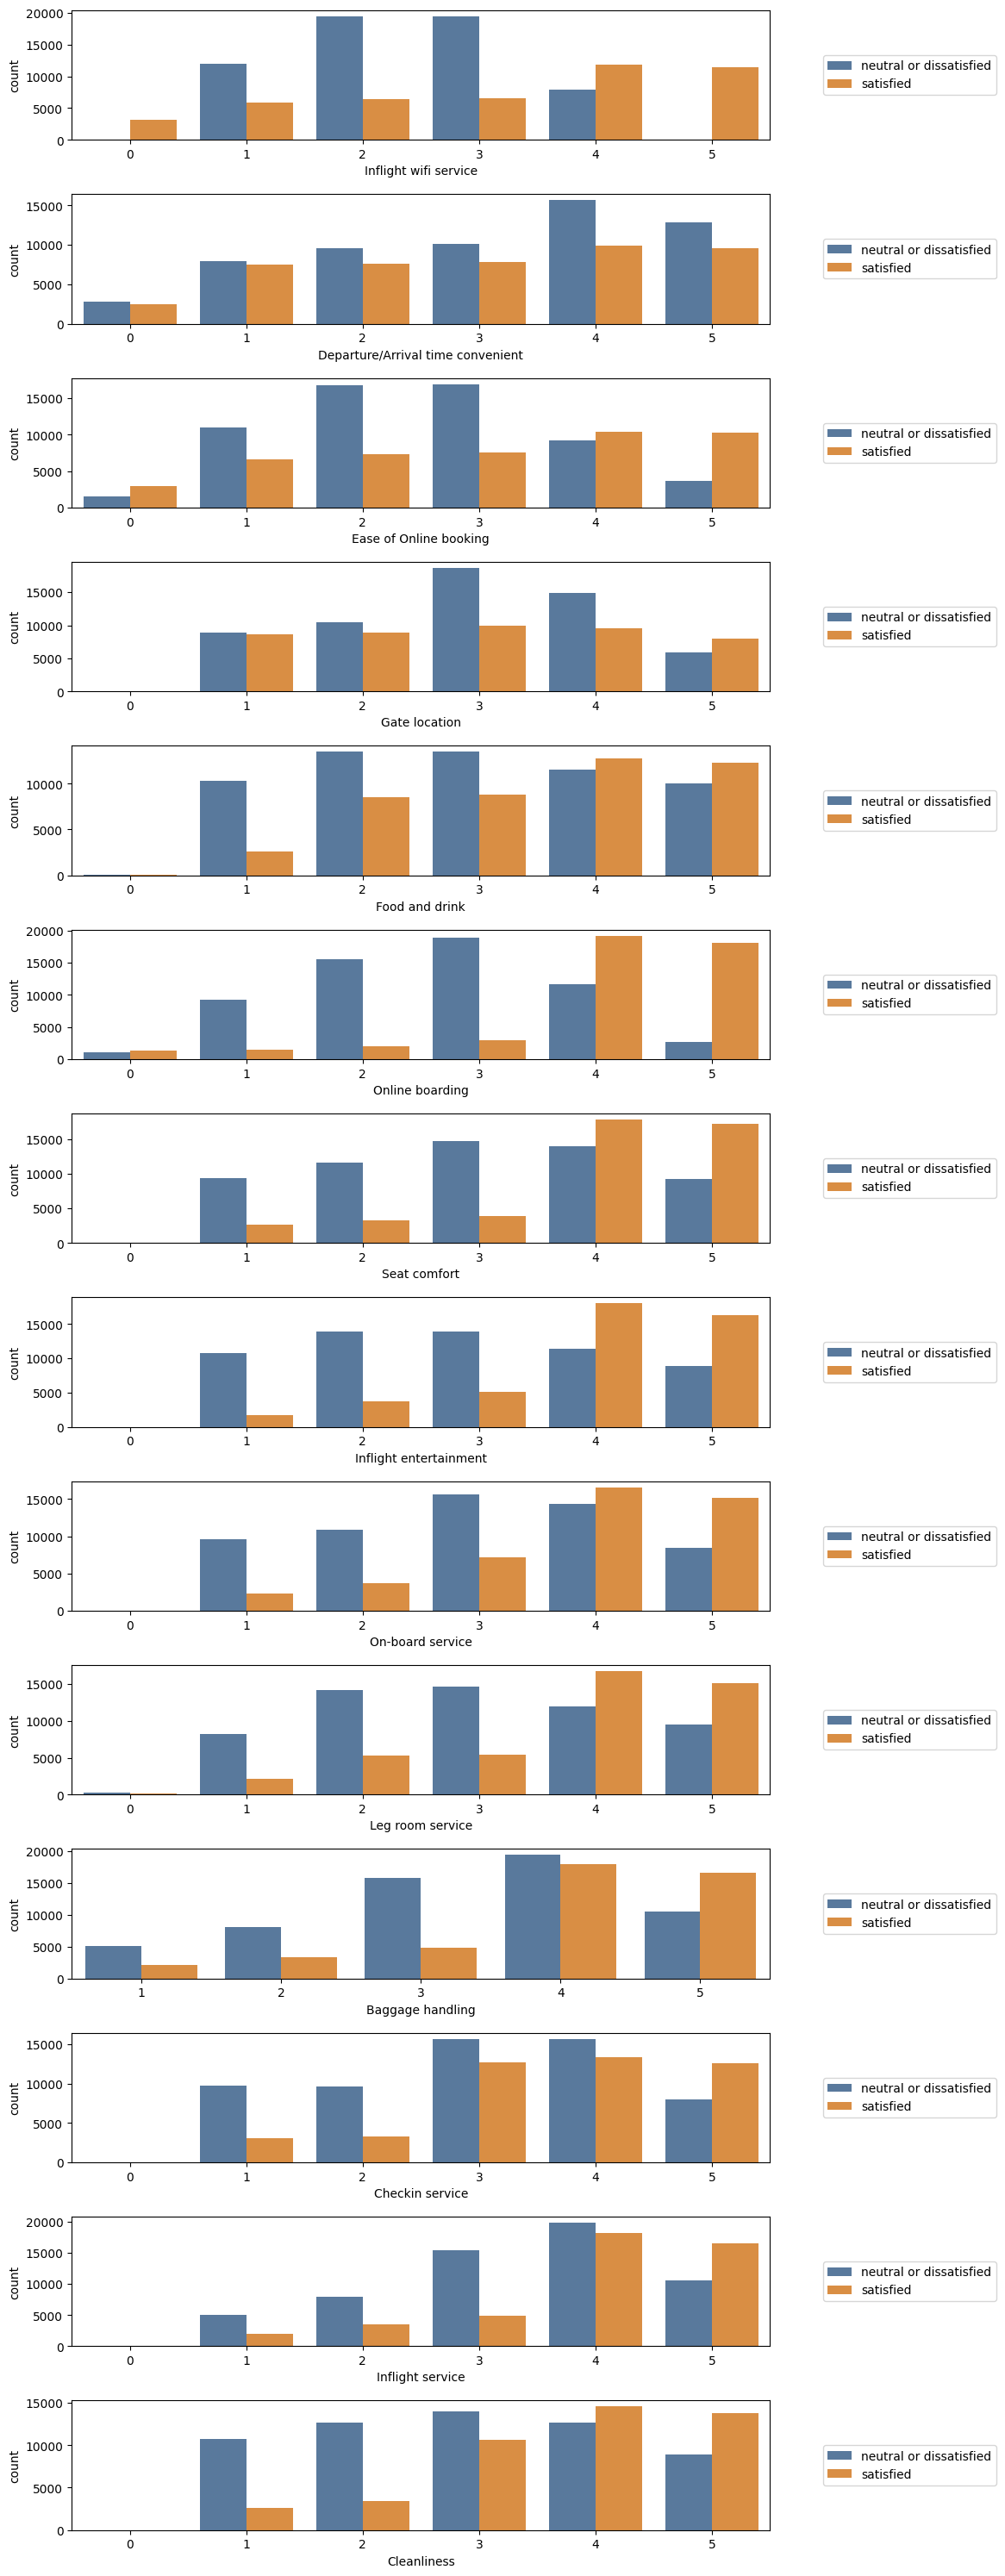

In [350]:
services = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", 'Gate location', 'Food and drink', 
            'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Inflight service', 'Cleanliness']

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 30))  # Aumenta el valor 30 para adaptarlo a la cantidad de subplots que tengas

for idx, column in enumerate(services):
    plt.subplot(len(services), 1, idx+1)
    sns.countplot(x=column, hue="satisfaction", data=df, palette=["#4e79a7", "#f28e2b"])
    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5))

# Ajustar la disposición de las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

# ANALISIS DE VARIABLES NUMERICAS

In [351]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178145
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640910
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [352]:
var_numericas = ["Age","Flight Distance","Inflight wifi service","Departure/Arrival time convenient",	"Ease of Online booking",
                 "Gate location",	"Food and drink",	"Online boarding",	"Seat comfort",	"Inflight entertainment",	"On-board service",	
                 "Leg room service",	"Baggage handling",	"Checkin service",	"Inflight service",	"Cleanliness",	"Departure Delay in Minutes",	
                 "Arrival Delay in Minutes"]

### SE GRAFICAN OUTLIERS DE TODAS LAS COLUMNAS

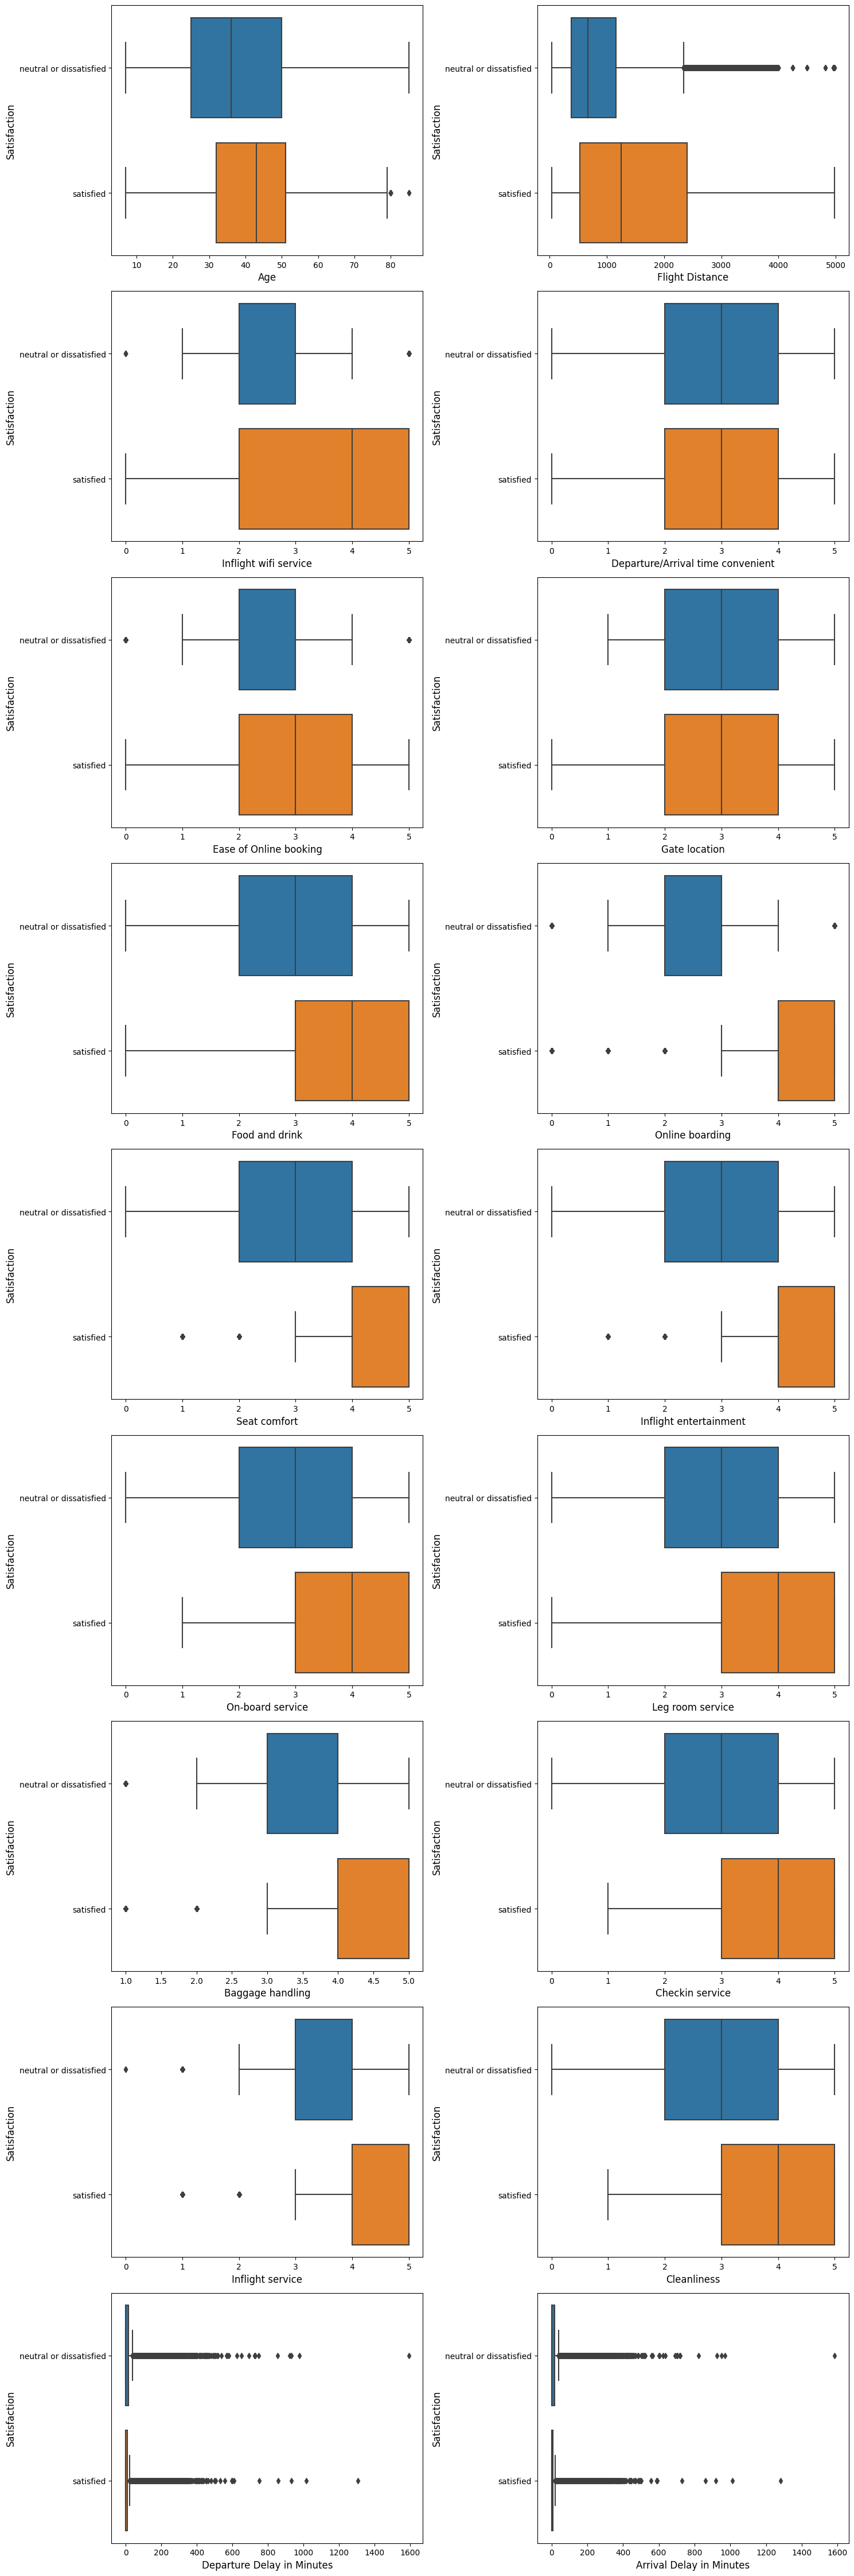

In [353]:
n_rows, n_cols = math.ceil(len(var_numericas) / 2), 2
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
i = 0

for num_col in var_numericas:
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data=df, x=num_col, y="satisfaction", ax=ax[row, col])
    ax[row, col].set_xlabel(num_col, fontsize=12)
    ax[row, col].set_ylabel('Satisfaction', fontsize=12)
    i += 1

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()

### ANALISIS DE COLUMNA "AGE"

In [354]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Feature Distribution')

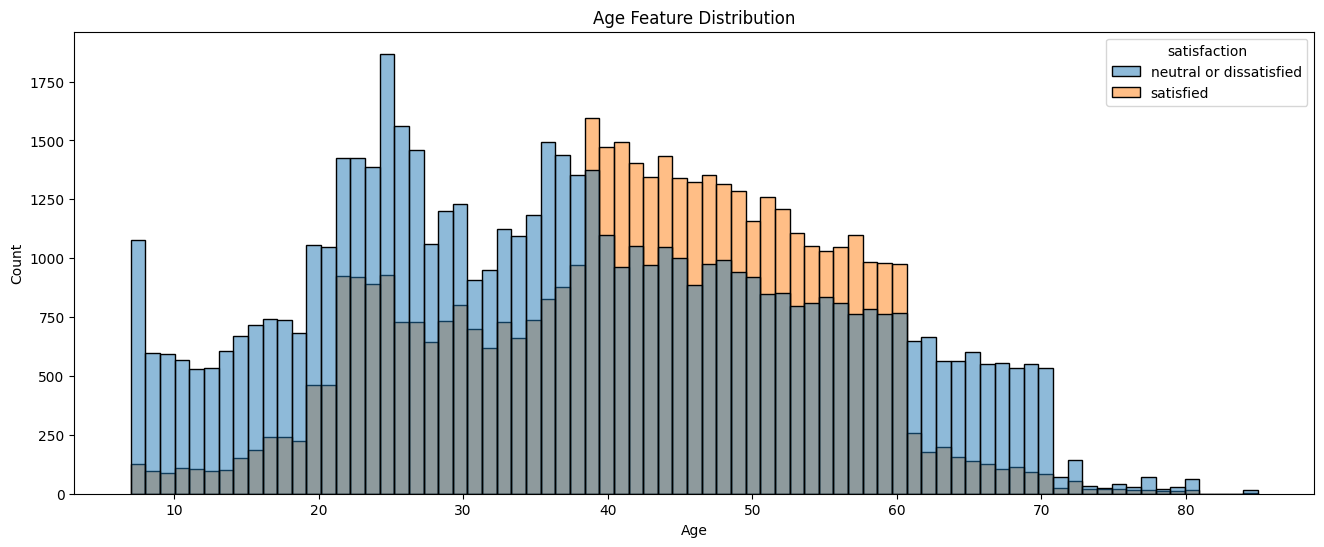

In [355]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="Age",  hue='satisfaction')
plt.title('Age Feature Distribution')

### - Intentamos hacer graficos de barras para visualizar si las respuestas estan en una desigualdad alta

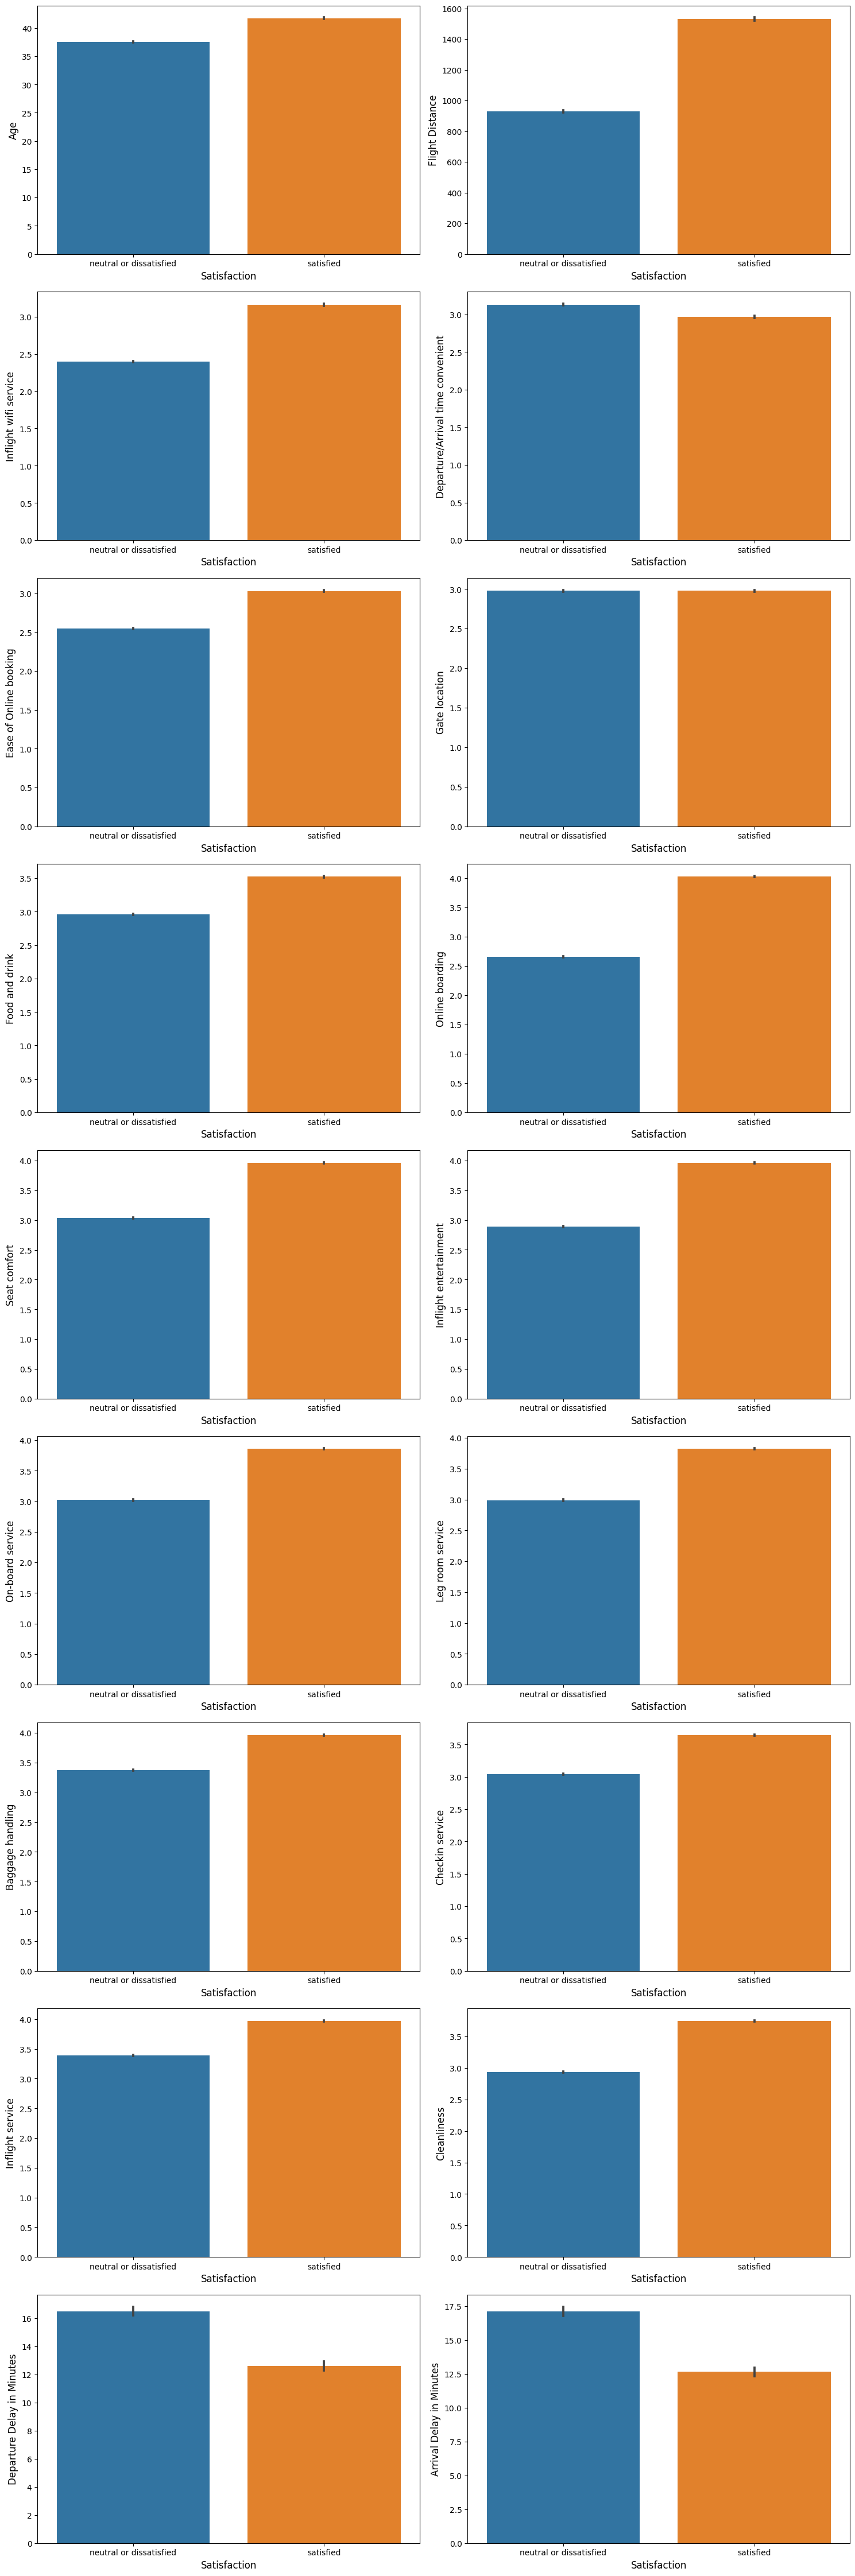

In [356]:
# Calcula el número de filas y columnas para organizar los subplots
n_rows, n_cols = math.ceil(len(var_numericas) / 2), 2

# Crea la figura y los ejes de los subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
i = 0

for num_col in var_numericas:
    row = i // n_cols
    col = i % n_cols
    sns.barplot(data=df, x="satisfaction", y=num_col, ax=ax[row, col])
    ax[row, col].set_xlabel("Satisfaction", fontsize=12)
    ax[row, col].set_ylabel(num_col, fontsize=12)
    i += 1

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()

In [357]:
df[["Seat comfort"]].value_counts()

Seat comfort
4               31765
5               26470
3               18696
2               14897
1               12075
0                   1
Name: count, dtype: int64

In [358]:
df[["Inflight wifi service"]].value_counts()

Inflight wifi service
3                        25868
2                        25830
4                        19794
1                        17840
5                        11469
0                         3103
Name: count, dtype: int64

### MAPA DE CORRELACION CON COLUMNAS NUMERICAS

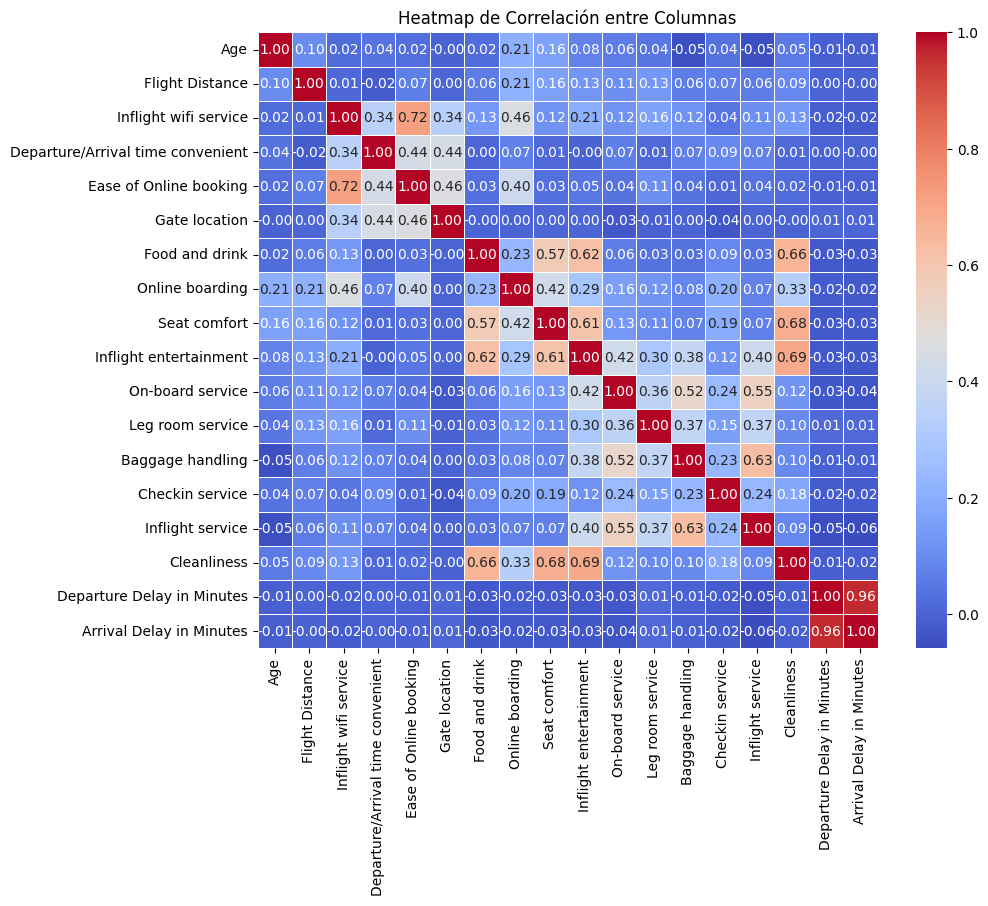

In [359]:
correlacion_numericas = df[var_numericas].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura, puede ponerse o no.
sns.heatmap(correlacion_numericas, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Columnas')
plt.show()

# ANALISIS DE VARIABLES CATEGORICAS

### Revisamos cuantas y cuales columnas categoricas hay

In [360]:
var_categoricas =[column for column, count in dict(df.nunique()).items()
             if (df[column].dtype=="O") & (count<10)]
var_categoricas

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

### Obtenemos las columnas con sus datos categoricos

In [361]:
# Obtener categorías únicas (incluyendo valores nulos) de las columnas deseadas
categorias_por_columna = {}
for columna in var_categoricas:
    categorias = df[columna].unique()
    categorias = [str(cat) if not pd.isnull(cat) else 'NaN' for cat in categorias]
    categorias_por_columna[columna] = categorias

# Mostrar las categorías en una tabla usando tabulate
tabla = []
for columna, categorias in categorias_por_columna.items():
    tabla.append([columna, ", ".join(categorias)])

tabla_formateada = tabulate(tabla, headers=["Columna", "Datos Categorícos (con Nulos)"], tablefmt="grid")
print(tabla_formateada)

+----------------+------------------------------------+
| Columna        | Datos Categorícos (con Nulos)      |
+================+====================================+
| Gender         | Male, Female                       |
+----------------+------------------------------------+
| Customer Type  | Loyal Customer, disloyal Customer  |
+----------------+------------------------------------+
| Type of Travel | Personal Travel, Business travel   |
+----------------+------------------------------------+
| Class          | Eco Plus, Business, Eco            |
+----------------+------------------------------------+
| satisfaction   | neutral or dissatisfied, satisfied |
+----------------+------------------------------------+


In [362]:
# Otra forma de hacerlo....esperar a sandra..
df["Gender"].to_frame()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
103899,Female
103900,Male
103901,Male
103902,Female


### VISUALIZAMOS CON GRAFICO DE BARRAS LAS VARIABLES CATEGORICAS

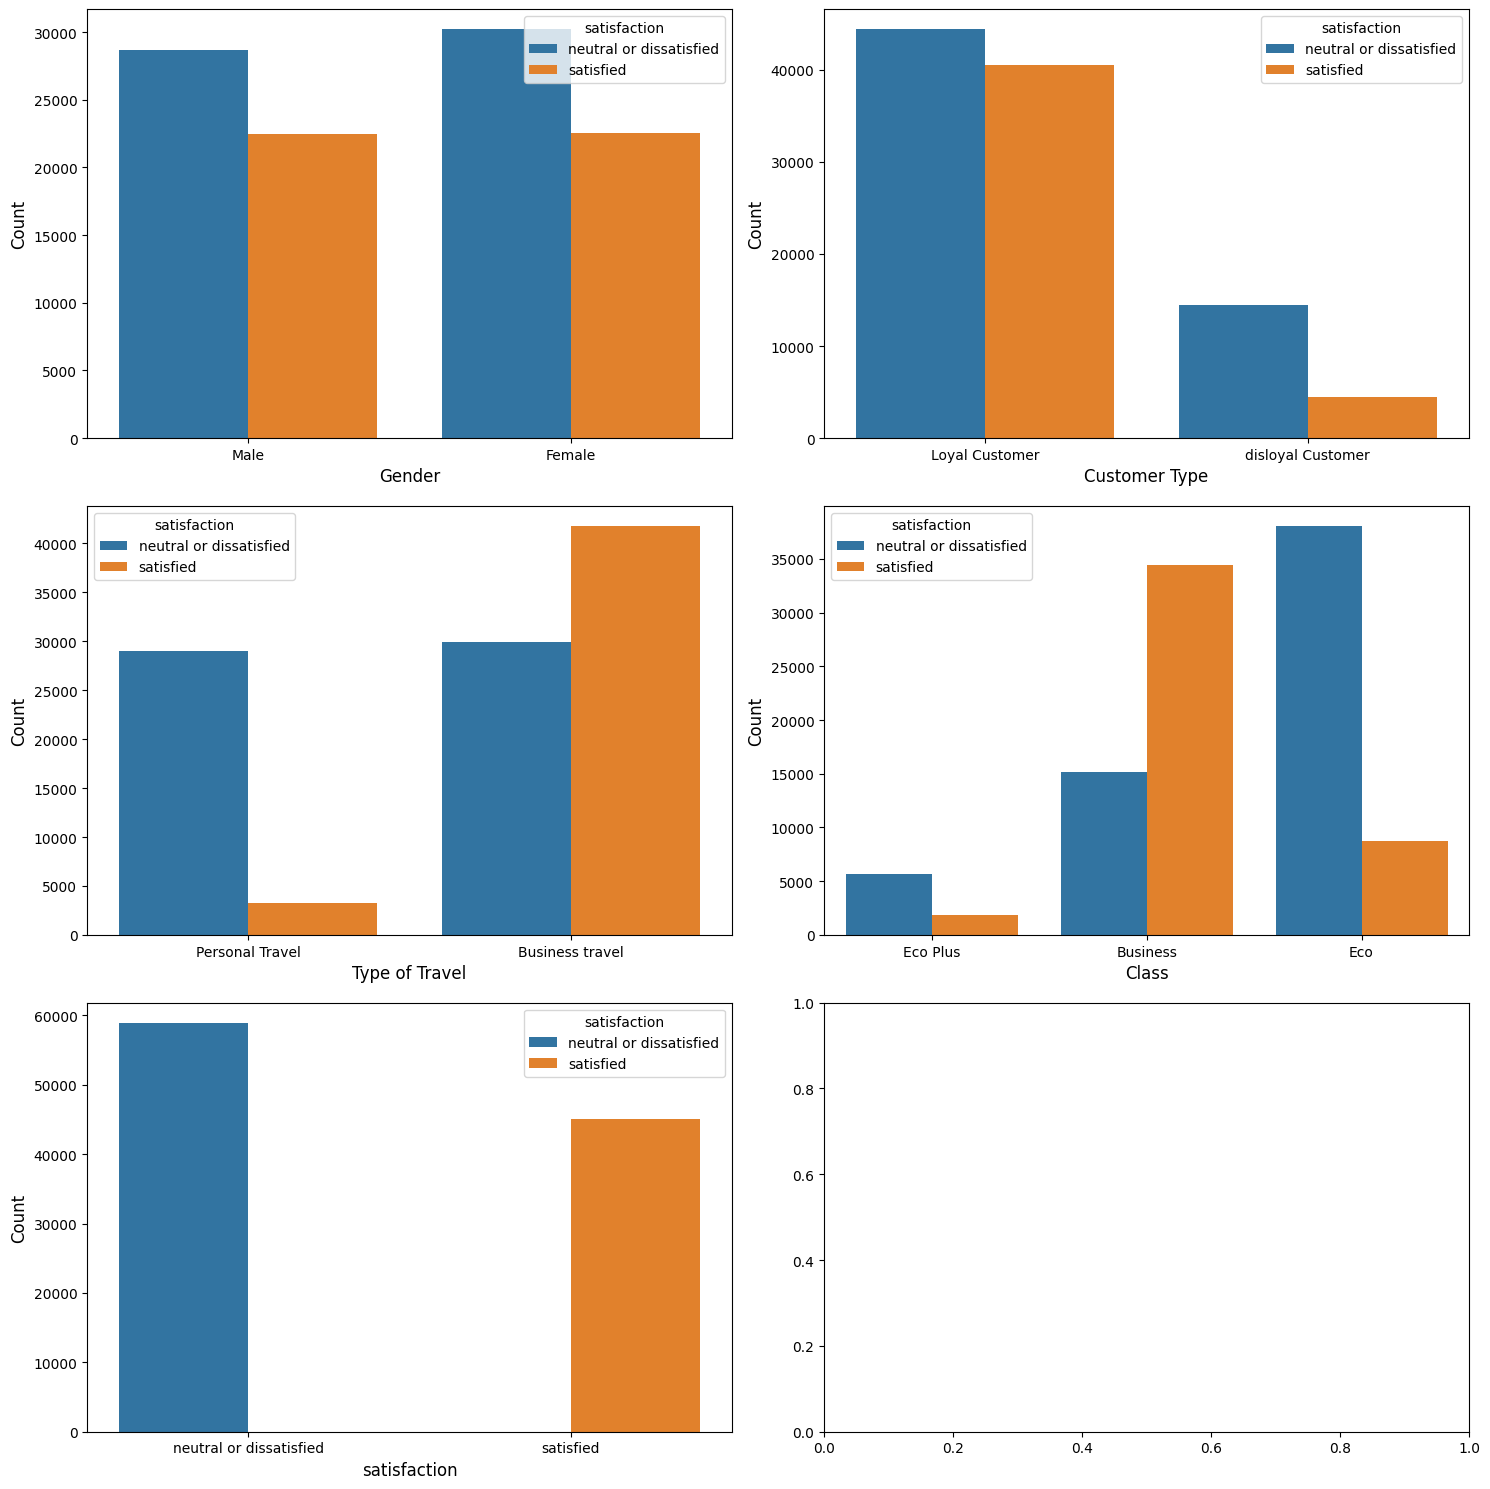

In [363]:
# Calcula el número de filas y columnas para organizar los subplots
n_rows, n_cols = math.ceil(len(var_categoricas) / 2), 2

# Crea la figura y los ejes de los subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
i = 0

for var_cat in var_categoricas:
    row = i // n_cols
    col = i % n_cols
    sns.countplot(data=df, x=var_cat, hue="satisfaction", ax=ax[row, col])
    ax[row, col].set_xlabel(var_cat, fontsize=12)
    ax[row, col].set_ylabel('Count', fontsize=12)
    i += 1

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()

# OUTLIERS

LAS SIGUIENTES LINEAS DE CODIGO SE USARÁN PARA BUSCAR OUTLIERS Y BORRARLOS

In [364]:
mean = df["Flight Distance"].mean()
std = df["Flight Distance"].std()

threshold = 3 * std

outliers = df[abs(df["Flight Distance"] - mean) > threshold]

In [365]:
df = df.drop(index=outliers.index)

# PRE PROCESAMIENTO: DIVISION DE DATOS

- La siguiente funcion se usará cuando el modelo ya esté entrenado y es para medir la capacidad del modelo

In [366]:
"""## Una función única
def model_prediction(model):
    model.fit(X_train, y_train) # Entreno el modelo
    #y_pred = model.predict(data_to_pred)
    
    x_train_pred = model.predict(X_train)
    x_test_pred = model.predict(X_test)
    #y_pred = model.predict(X_final_transformed)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    return x_test_pred"""


'## Una función única\ndef model_prediction(model):\n    model.fit(X_train, y_train) # Entreno el modelo\n    #y_pred = model.predict(data_to_pred)\n    \n    x_train_pred = model.predict(X_train)\n    x_test_pred = model.predict(X_test)\n    #y_pred = model.predict(X_final_transformed)\n    a = accuracy_score(y_train,x_train_pred)*100\n    b = accuracy_score(y_test,x_test_pred)*100\n    \n    training_score.append(a)\n    testing_score.append(b)\n    \n    print(f"Accuracy_Score of {model} model on Training Data is:",a)\n    print(f"Accuracy_Score of {model} model on Testing Data is:",b)\n    print("\n------------------------------------------------------------------------")\n    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))\n    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))\n    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))\n    print("\n---------------------------------------------------------

In [367]:
"""# Una función única 
def model_prediction(model):
    model.fit(X_train_transformed, y_train) # Entreno el modelo
    #y_pred = model.predict(data_to_pred)
    
    x_train_pred = model.predict(X_train_transformed)
    x_test_pred = model.predict(X_test_transformed)
    #y_pred = model.predict(X_final_transformed)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    #print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    #print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    #print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

    return x_test_pred
    #return y_pred"""

'# Una función única \ndef model_prediction(model):\n    model.fit(X_train_transformed, y_train) # Entreno el modelo\n    #y_pred = model.predict(data_to_pred)\n    \n    x_train_pred = model.predict(X_train_transformed)\n    x_test_pred = model.predict(X_test_transformed)\n    #y_pred = model.predict(X_final_transformed)\n    a = accuracy_score(y_train,x_train_pred)*100\n    b = accuracy_score(y_test,x_test_pred)*100\n    \n    training_score.append(a)\n    testing_score.append(b)\n    \n    print(f"Accuracy_Score of {model} model on Training Data is:",a)\n    print(f"Accuracy_Score of {model} model on Testing Data is:",b)\n    print("\n------------------------------------------------------------------------")\n    #print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))\n    #print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))\n    #print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))\n    print("\n------------------

## SEPARACION DE CARACTERISTICAS Y VARIABLE OBJETIVO

In [368]:
var_numericas = ["Age","Flight Distance","Inflight wifi service","Departure/Arrival time convenient",	"Ease of Online booking",
                 "Gate location",	"Food and drink",	"Online boarding",	"Seat comfort",	"Inflight entertainment",	"On-board service",	
                 "Leg room service",	"Baggage handling",	"Checkin service",	"Inflight service",	"Cleanliness",	"Departure Delay in Minutes",	
                 "Arrival Delay in Minutes"]

var_categoricas = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [369]:

# Separar características (X) y variable objetivo (y)
#df_f = pd.DataFrame(df)
X = df.drop(columns=['satisfaction'])  # Características
y = df['satisfaction']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación one-hot para variables categóricas en los conjuntos de entrenamiento y prueba
#categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

#X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
#X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

In [370]:
# Crear los imputadores. ¿Realmente esto lo tengo que hacer aquí?
imputer1 = SimpleImputer(strategy="most_frequent")  # Para características categóricas
imputer2 = SimpleImputer(strategy="median")         # Para características numéricas

In [371]:
# Nuevos pipelines --> Define transformadores para variables numéricas (num_transformer) y categóricas (cat_transformer).

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', MinMaxScaler())
    ])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(sparse=False)), 
    ])

In [372]:
#Aplicar los transformer a nuestras features usando ColumnTransformer, es nuestro pre-procesamiento.

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_transformer, var_numericas),
        ('categorical', cat_transformer, var_categoricas)
    ])

In [373]:
# Definir los mejores parámetros (estos parametros se definieron ya habiendo corrido
# la sigueinte linea de cosigo que buscaron los mejores parametros)
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

# Crear un modelo de Gradient Boosting con los mejores parámetros
gb_model = GradientBoostingClassifier(**best_params)

# Crear el pipeline que combina el preprocesador y el modelo.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_boosting', gb_model)
])

## BUSQUEDA DE HIPERPARAMETROS

Con este codigo se buscaron los mejores hiperparametro los cuales se utilizan y ya se comenta para no tener que usar mas esta linea de codigo y poner mas lento el programa.

Best Gradient Boosting Model - Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

In [374]:
# Definir la cuadrícula de hiperparámetros a explorar
# param_grid = {
    #'n_estimators': [50, 100, 150],
    #'learning_rate': [0.01, 0.1, 0.2],
    #'max_depth': [3, 5, 7]

# Realizar Grid Search con validación cruzada
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
# best_params = grid_search.best_params_
# best_gb_model = grid_search.best_estimator_

# print("Best Gradient Boosting Model - Best Params:", best_params)

- A continuación, podemos usar el pipeline para entrenar y evaluar tu modelo.
Por ejemplo, puedes ajustar el pipeline a tus datos de entrenamiento y realizar predicciones:


In [375]:
pipeline.fit(X_train, y_train)  # Ajustar el pipeline a tus datos de entrenamiento

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board servi...
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('gradient_boosting',
                 GradientBoostingClassifier(max_depth=7, n_estimators=150))])

In [376]:
y_pred = pipeline.predict(X_test)  # Realizar predicciones en datos de prueba

In [377]:
# Guardar el pipeline usando Pickle
with open('data_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Cargar el pipeline desde el archivo
with open('data_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [378]:
# Aplicar el pipeline a los datos de prueba
pipeline.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board servi...
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('gradient_boosting',
                 GradientBoostingClassifier(max_depth=7, n_estimators=150))])

In [379]:
# Obtiene las predicciones del modelo en los datos de prueba
y_test_pred = pipeline.predict(X_test)

In [380]:
# Realizar predicciones con el pipeline cargado (opcional)
y_test_pred = loaded_pipeline.predict(X_test)

# PROBANDO MODELOS

In [381]:
# Definir listas para almacenar los puntajes de precisión
training_score = []  # Lista para puntajes de precisión en datos de entrenamiento
testing_score = []   # Lista para puntajes de precisión en datos de prueba

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board servi...
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('gradient_boosting',
                 GradientBoostingClassifier(max_depth=7, n_estimators=150))])

In [382]:
# Realizar predicciones en los datos de entrenamiento y prueba
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [387]:
# Calcular el puntaje de precisión en los datos de entrenamiento y prueba
a = accuracy_score(y_train, y_train_pred) * 100
b = accuracy_score(y_test, y_test_pred) * 100

training_score.append(a)
testing_score.append(b)

print(f"Accuracy Score of {GradientBoostingClassifier} model on Training Data is: {a:.2f}%")
print(f"Accuracy Score of {GradientBoostingClassifier} model on Testing Data is: {b:.2f}%")


# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion)

# Mostrar el informe de clasificación
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_rep)

# Calcular la diferencia de precisión entre entrenamiento y prueba
accuracy_difference = a - b
print(f"Accuracy Difference between Training and Testing (OVERFITTING): {accuracy_difference:.2f}%")

Accuracy Score of <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> model on Training Data is: 97.75%
Accuracy Score of <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> model on Testing Data is: 96.44%
Confusion Matrix:
[[11503   219]
 [  520  8528]]
Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     11722
              satisfied       0.97      0.94      0.96      9048

               accuracy                           0.96     20770
              macro avg       0.97      0.96      0.96     20770
           weighted avg       0.96      0.96      0.96     20770

Accuracy Difference between Training and Testing (OVERFITTING): 1.31%


# ANALISIS DE CORRELACION

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])

corr_matrix = df.corr()
print(corr_matrix)

### CONCLUSION

- Edad: La edad tiene una correlación positiva débil (0.137) con la satisfacción. Esto sugiere que los pasajeros mayores tienden a estar ligeramente más satisfechos en comparación con los pasajeros más jóvenes.
- Distancia del Vuelo (Flight Distance): La distancia del vuelo tiene una correlación negativa moderada (-0.299) con la satisfacción. Esto indica que a medida que la distancia del vuelo aumenta, la satisfacción tiende a disminuir. Los vuelos más largos podrían estar asociados con niveles de satisfacción más bajos.
  
- Embarque en Línea (Online Boarding): La variable "Online Boarding" tiene una correlación negativa fuerte (-0.503) con la satisfacción. Esto significa que los pasajeros que tienen una experiencia de embarque en línea mejor tienden a estar más satisfechos con el servicio.
  
- Comodidad del Asiento (Seat Comfort): La comodidad del asiento tiene una correlación positiva fuerte (0.349) con la satisfacción. Los pasajeros que encuentran cómodos los asientos tienden a estar más satisfechos.

- Entretenimiento a Bordo (Inflight Entertainment): El entretenimiento a bordo tiene una correlación positiva fuerte (0.398) con la satisfacción. Los pasajeros que disfrutan del entretenimiento a bordo tienden a estar más satisfechos.

- Limpieza (Cleanliness): La limpieza tiene una correlación positiva moderada (0.305) con la satisfacción. Los pasajeros que perciben que la cabina está limpia tienden a estar más satisfechos.
  
- Clase (Class): La clase de vuelo también tiene una influencia en la satisfacción. La variable "Class_Eco" tiene una correlación negativa moderada con la satisfacción, mientras que "Class_Business" tiene una correlación positiva moderada. Esto sugiere que los pasajeros de clase económica pueden estar menos satisfechos en comparación con los pasajeros de clase business.
  
- Tipo de Viaje (Type of Travel): La variable "Type of Travel_Personal Travel" tiene una correlación negativa moderada con la satisfacción, lo que sugiere que los viajes de negocios podrían estar asociados con niveles de satisfacción más altos en comparación con los viajes personales.
  
- Tipo de Cliente (Customer Type): La variable "Customer Type_Loyal Customer" tiene una correlación positiva moderada con la satisfacción, lo que sugiere que los clientes leales tienden a estar más satisfechos.
  
- Tiempo de Llegada y Salida Conveniente (Departure/Arrival Time Convenient): Esta característica tiene una correlación positiva débil (0.052) con la satisfacción. Los pasajeros que consideran que el tiempo de llegada y salida es conveniente tienden a estar ligeramente más satisfechos.

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()